## Problem 2a.
Need to solve the following ODE:

$u^{''}+cu^{'}+\omega ^{2}u=f(t), u(0)=I, u^{'}(0)=V,t \in (0,T]$

where $c>0$

In [64]:
import numpy as np
import matplotlib.pyplot as plt
"""
    f(t): Takes an argument t, where t is some time variable
    The forcing function of concern for the assignment. In this instance, it is f(t)=sin(t)
"""
def f(t):
    f=np.sin(t)
    return(f)
"""
    exact(t): Takes an argument t, where t is some time variable.
 Returns the exact solution to the approximated, numerical solution.
"""
def exact(t):
    u_e=np.exp(-t)*(0.5*np.sin(2*t)+np.cos(2*t))+(0.2)*np.sin(t)-(0.1)*np.cos(t)
    return(u_e)
""" 
    solver
    f is forcing function
    I is the initial displacement
    V is the initial velocity
    c is the damping coefficient
    w is the angular frequency
    dt is the sampling rate
    T is the total length of time we wish to approximate over
    returns u,t the numerical solution and the time range over which it is approximated.
"""
def solver(f,I,V,c,w,dt,T):
    dt=float(dt)
    Nt=int(round(T/dt))
    u=np.zeros(Nt+1)
    t=np.linspace(0,Nt*dt,Nt+1)
    u[0]=I
    alpha=(2-dt**2*w**2)/(1+(c/2)*dt)
    beta=(dt**2)/(1+(c/2)*dt)
    gamma=((c/2)*dt-1)/(1+(c/2)*dt)
    u[1]=(alpha*u[0]-gamma*2*dt*V+beta*f(t[0]))/(1-gamma)
    for j in range(1,Nt):
        u[j+1]=((2-dt**2*w**2)*u[j]+((c/2)*dt-1)*u[j-1]+(dt**2)*f(t[j]))/(1+(c/2)*dt)
    return(u,t)

## Problem 2b. 
$f(t)=sin(t)$, $I=\frac{9}{10}$ m ,$V=\frac{1}{5}$ m/s,$c=2$ 1/s,$\omega = \sqrt{5}$ $1/s^{2}$, $\Delta t=0.5$ s, $T=20$ s

In [65]:
I=9/10
V=1/5
c=2
w=np.sqrt(5)
dt=0.5
T=20
(u,t)=solver(f,I,V,c,w,dt,T)
dt_fine=0.01
t_fine=np.arange(0,T,dt_fine)
u_fine=np.zeros(len(t_fine))
for j in range(len(t_fine)):
    u_fine[j]=exact(t_fine[j])

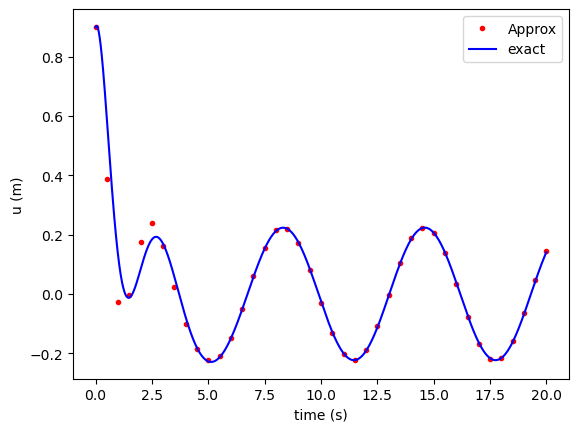

In [66]:
plt.plot(t,u,"r.",label="Approx")
plt.plot(t_fine,u_fine,"b-",label="exact")
plt.xlabel("time (s)")
plt.ylabel("u (m)")
plt.legend()